In [1]:
from google.colab import files
uploaded = files.upload()


Saving animal_dataset.zip to animal_dataset.zip


In [2]:
!unzip animal_dataset.zip -d data


Archive:  animal_dataset.zip
   creating: data/animal_dataset/
   creating: data/animal_dataset/cat/
  inflating: data/animal_dataset/cat/cats_00001.jpg  
  inflating: data/animal_dataset/cat/cats_00002.jpg  
  inflating: data/animal_dataset/cat/cats_00003.jpg  
  inflating: data/animal_dataset/cat/cats_00004.jpg  
  inflating: data/animal_dataset/cat/cats_00005.jpg  
  inflating: data/animal_dataset/cat/cats_00006.jpg  
  inflating: data/animal_dataset/cat/cats_00007.jpg  
  inflating: data/animal_dataset/cat/cats_00008.jpg  
  inflating: data/animal_dataset/cat/cats_00009.jpg  
  inflating: data/animal_dataset/cat/cats_00010.jpg  
  inflating: data/animal_dataset/cat/cats_00011.jpg  
  inflating: data/animal_dataset/cat/cats_00012.jpg  
  inflating: data/animal_dataset/cat/cats_00013.jpg  
  inflating: data/animal_dataset/cat/cats_00014.jpg  
  inflating: data/animal_dataset/cat/cats_00015.jpg  
  inflating: data/animal_dataset/cat/cats_00016.jpg  
  inflating: data/animal_dataset/ca

Total images: 300
Classes: ['cat', 'dog', 'panda']

Best L1 (Manhattan) K: 12 Accuracy: 0.44666666666666666
Best L2 (Euclidean) K: 10 Accuracy: 0.4366666666666667


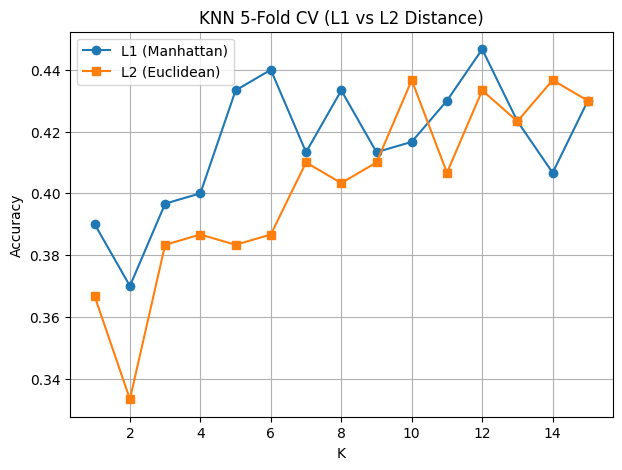

In [3]:
%matplotlib inline
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# -----------------------------
# Dataset path
# -----------------------------
DATA_DIR = "data/animal_dataset"   # your extracted folder

# -----------------------------
# Load dataset
# -----------------------------
def load_dataset(root):
    X, y, names = [], [], []
    classes = sorted(os.listdir(root))
    class_to_id = {cls: i for i, cls in enumerate(classes)}

    for cls in classes:
        folder = os.path.join(root, cls)
        if not os.path.isdir(folder):
            continue

        for f in os.listdir(folder):
            if f.lower().endswith(("jpg","jpeg","png")):
                img = Image.open(os.path.join(folder, f)).convert("L").resize((32,32))
                arr = np.array(img).reshape(-1) / 255.0
                X.append(arr)
                y.append(class_to_id[cls])
                names.append(f)

    return np.array(X), np.array(y), names, classes

X, y, filenames, class_names = load_dataset(DATA_DIR)

print("Total images:", X.shape[0])
print("Classes:", class_names)

# -----------------------------
# 5-Fold CV
# -----------------------------
K_VALUES = range(1, 16)

def evaluate(metric):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    mean_acc = []

    for k in K_VALUES:
        fold_acc = []
        for tr, val in skf.split(X, y):
            model = KNeighborsClassifier(n_neighbors=k, metric=metric)
            model.fit(X[tr], y[tr])
            pred = model.predict(X[val])
            fold_acc.append(accuracy_score(y[val], pred))
        mean_acc.append(np.mean(fold_acc))
    return np.array(mean_acc)

acc_l1 = evaluate("manhattan")
acc_l2 = evaluate("euclidean")

# Find best K values
best_k_l1 = K_VALUES[np.argmax(acc_l1)]
best_k_l2 = K_VALUES[np.argmax(acc_l2)]

print("\nBest L1 (Manhattan) K:", best_k_l1, "Accuracy:", acc_l1.max())
print("Best L2 (Euclidean) K:", best_k_l2, "Accuracy:", acc_l2.max())

# -----------------------------
# Plot accuracy graph
# -----------------------------
plt.figure(figsize=(7,5))
plt.plot(K_VALUES, acc_l1, marker="o", label="L1 (Manhattan)")
plt.plot(K_VALUES, acc_l2, marker="s", label="L2 (Euclidean)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("KNN 5-Fold CV (L1 vs L2 Distance)")
plt.grid(True)
plt.legend()
plt.show()


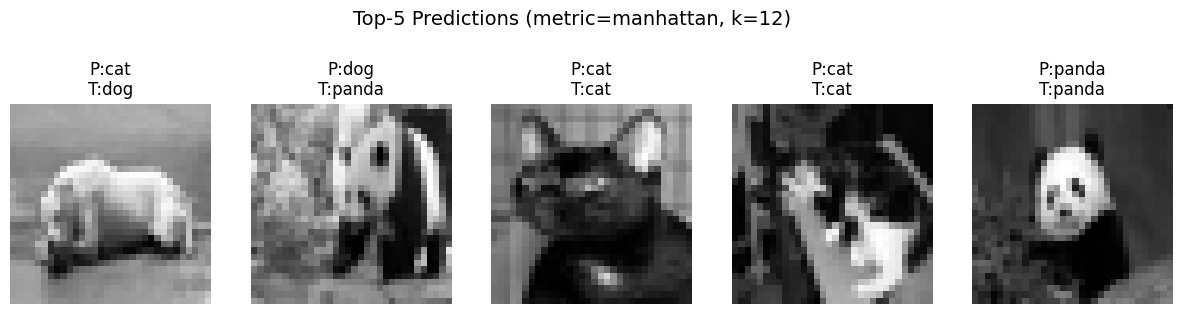

In [4]:
import matplotlib.pyplot as plt

# choose best model
best_metric = "manhattan" if acc_l1.max() >= acc_l2.max() else "euclidean"
best_k = best_k_l1 if best_metric=="manhattan" else best_k_l2

model = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
model.fit(X, y)

# pick 5 random images to display
indices = np.random.choice(len(X), 5, replace=False)
preds = model.predict(X[indices])

plt.figure(figsize=(15, 4))

for i, idx in enumerate(indices):
    img = X[idx].reshape(32, 32)  # reshape flattened image
    true_class = class_names[y[idx]]
    pred_class = class_names[preds[i]]

    plt.subplot(1, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"P:{pred_class}\nT:{true_class}")

plt.suptitle(f"Top-5 Predictions (metric={best_metric}, k={best_k})", fontsize=14)
plt.show()


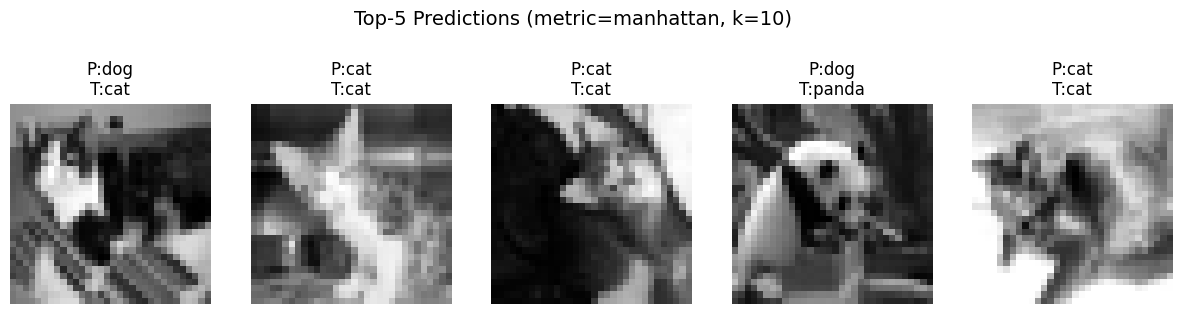

In [5]:
import matplotlib.pyplot as plt

# Metric selection logic aager motoi rakhlam (jodi acc_l1/acc_l2 variable thake)
# Na thakle sorasori best_metric = "euclidean" likhe dite paren
best_metric = "manhattan" if acc_l1.max() >= acc_l2.max() else "euclidean"


best_k = 10

model = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
model.fit(X, y)

# pick 5 random images to display
indices = np.random.choice(len(X), 5, replace=False)
preds = model.predict(X[indices])

plt.figure(figsize=(15, 4))

for i, idx in enumerate(indices):
    img = X[idx].reshape(32, 32)  # reshape flattened image
    true_class = class_names[y[idx]]
    pred_class = class_names[preds[i]]

    plt.subplot(1, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"P:{pred_class}\nT:{true_class}")

plt.suptitle(f"Top-5 Predictions (metric={best_metric}, k={best_k})", fontsize=14)
plt.show()